# Module 3 notebook - pandas

## Introduction

This workbook contains my results for the assignment as specified below. I'll start, however, with a few pandas exercises from the DataCamp source:

- [chapter 1 from _Manipulating DataFrames with pandas_](http://bit.ly/2ftzLk0)

In [ ]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

# Inspect the list using print()
print(zipped)

# Build a dictionary with the zipped list: data
data = dict(zipped)

# Build and inspect a DataFrame from the dictionary: df
df = pd.DataFrame(data)
print(df)

In [ ]:
# Make a string with the value 'PA': state
state = "PA"

# Construct a dictionary: data
data = {'state': state, 'city': cities}

# Construct a DataFrame from dictionary data: df
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


In [ ]:
# Create a plot with color='red'
df.plot(color="red", grid=True)

# Add a title
plt.title("Temperature in Austin")

# Specify the x-axis label
plt.xlabel("Hours since midnight August 1, 2010")

# Specify the y-axis label
plt.ylabel("Temperature (degrees F)")

# Display the plot
plt.show()

print(type(plt))

In [ ]:
# Plot all columns (default)
df.plot()
plt.show()

# Plot all columns as subplots
df.plot(subplots=True)
plt.show()

# Plot just the Dew Point data
column_list1 = ['Dew Point (deg F)']
df[column_list1].plot()
plt.show()

# Plot the Dew Point and Temperature data, but not the Pressure data
column_list2 = ['Temperature (deg F)','Dew Point (deg F)']
df[column_list2].plot()
plt.show()


## Assignment - Using pandas on my home brew data set

### Introduction

This assignment is an analysis exercise. It is not as much about the meaning of the analysis you will conduct as it is on the demonstration of common functionality you will use when doing data analysis with pandas. So first an for all it is a demonstration of your pandas skills.

### Step 1: data set construction

Construct an artificial dataset using either Excel, Google Sheets or numpy. Your constructed dataset has at least:

1. 100 rows (measurements/events)
1. 4 columns (variables)
1. one date column with random daily dates in a period of at least 6 months
1. 2 columns containing categorical variables
1. 2 columns containing numerical variables

You can use Excel's
- rand()
- randbetween()
- norm.inv()
- date()
- vlookup()

functions (or Google Sheets' equivalents) to construct your data set. If you use numpy. you can use the versatile random functions in it. If you wish you can polish your dataset by changing some randomly generated values by hand.

Make up a story around your data. In other words: give your data meaning by explaining what your data represents. Being creative in making up your story helps you in improving the joy of doing this exercise! Even better: fabricate some compelling facts in your data that you will extract in your analysis of it.

### Step 2: doing the analysis in pandas

Conduct an analysis on your data set. Demonstrate your skills in using the following pandas functionality

- creating indexes and multiply indices
- stacking and unstacking indices
- indexing and slicing using loc() and iloc()
- using pivot table functionality
- using grouping functionality both on categorical variables as on datetime variables
- using basic statistical functions as count, mean, average and min/max
- plotting (parts of) your data using pandas plotting functionality and seaborn

Also, use an alternative SQL approach for one of your analysis steps. Just show that you are capable of leveraging your SQL skills in pandas.

Annotate your analysis using markdown cells in your notebook. Briefly introduce each step in your analysis you take and lead your reader through your analysis. Here you have to apply your creativity to make up a sensible, interesting story for your user.

Tip: consult the [Python Data Science Handbook](http://bit.ly/2ftE137). It has an excellent chapter on pandas with examples for all techniques you are asked to demonstrate.

In [2]:
import datetime as dt
import numpy as np
import pandas as pd
import random


def get_random_dates(start_date="2017-01-01", max_days=365, length=100):
    return [np.datetime64(start_date) + range(max_days)[random.randint(0, max_days -1)] for i in range(length)]


def get_random_cities(cities=["Berlin", "Düsseldorf", "Köln", "Stuttgart", "München"], length=100):
    return [cities[random.randint(0, len(cities) - 1)] for i in range(100)]


def get_random_feinstaubwerte(diesel=None, min=5, max=30, length=100):
    if diesel is None:
        return [random.uniform(min, max) for i in range(length)]
    result = []
    for i in diesel:
        value = random.uniform(min, max)
        if i > 50:
            value *= 1.5
        result.append(value)
    return result


def get_random_diesel_percentage(length=100):
    return [random.randint(45, 65) for i in range(length)]


def get_random_dataframe(my_length=100):
    dates = get_random_dates(length=my_length)
    cities = get_random_cities(length=my_length)
    diesel = get_random_diesel_percentage(length=my_length)
    feinstaub = get_random_feinstaubwerte(diesel=diesel, length=my_length)
    
    result = pd.DataFrame({"date": dates, "city": cities,
                           "feinstaub": feinstaub, "diesel": diesel})

    result.drop_duplicates(subset=["date", "city"], inplace=True)

    result.sort_values("date", inplace=True)
    return result


def main():
    dates = get_random_dates()
    cities = get_random_cities()
    diesel = get_random_diesel_percentage()
    feinstaubwerte = get_random_feinstaubwerte(diesel)
    

    a = open("data.csv", "w")
    a.write("date,city,feinstaub,dieselanteil")
    for i in range(100):
        a.write("{},{},{},{}\n".format(dates[i],
                                     cities[i],
                                     feinstaubwerte[i],
                                     diesel[i]))
    a.close()


if __name__ == "__main__":
    main()

In [21]:
# analysing created data

a = get_random_dataframe()

# have a look at raw data first
print(a)

# see if any one city has higher values for fine dust, conclusion should be no (random data, results may vary)
a.groupby("city").mean()


def get_month(month_number, df):
    return [l for l in df if l["date"].to_pydatetime().month == month_number]

for i in range(1, 13):
    print(get_month(i, a))




          city       date  diesel  feinstaub
11        Köln 2017-01-08      49  22.970546
28        Köln 2017-01-12      46  19.078210
54        Köln 2017-01-14      61  37.780074
6       Berlin 2017-01-14      64  25.638973
58      Berlin 2017-01-16      54  32.313172
34   Stuttgart 2017-01-17      49  18.867287
0      München 2017-01-19      56  37.539936
97      Berlin 2017-01-19      59  37.673066
9       Berlin 2017-01-22      57   7.604254
59      Berlin 2017-01-24      51  35.989034
56      Berlin 2017-01-26      62  34.318123
50      Berlin 2017-02-03      55  43.504067
87  Düsseldorf 2017-02-08      56  22.873463
32      Berlin 2017-02-19      53  43.611214
17  Düsseldorf 2017-02-22      52  38.748611
3    Stuttgart 2017-02-22      54  28.447357
23      Berlin 2017-02-22      46  16.949359
16  Düsseldorf 2017-02-28      56  43.947670
63  Düsseldorf 2017-03-04      45  21.875281
46      Berlin 2017-03-10      62  18.303135
31  Düsseldorf 2017-03-14      64  36.715114
47   Stutt

TypeError: string indices must be integers

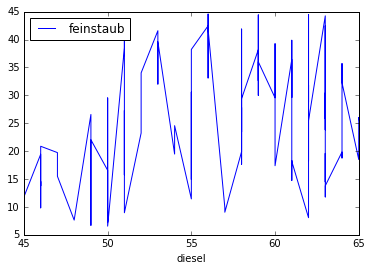

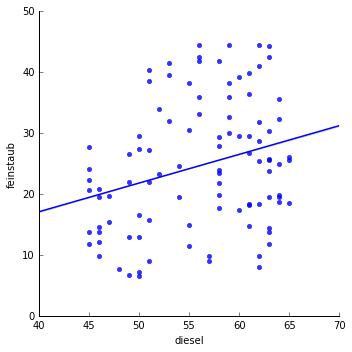

In [6]:
# plotting simple relation between diesel percentage and fine dust measurements
# difficult to find any meaningful data in this plot
a.sort_values("diesel").plot(x="diesel", y="feinstaub", style="-")

# using seaborn to draw linear regression model
# shows slight rise in fine dust values with rising diesel percentages
# as expected, random data was manipulated to show this
import seaborn as sns
sns.lmplot(x='diesel',y='feinstaub',data=a,fit_reg=True, ci=0) 